In [16]:
# tsfresh install
# import sys
# !{sys.executable} -m pip install tsfresh

In [11]:
# pip list

In [17]:
# import os
# os.kill(os.getpid(), 9)

## 데이터 불러오기

In [13]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()

In [19]:
timeseries, y = load_robot_execution_failures()

In [20]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [ ]:
y

## 데이터 가공하기

In [22]:
# feature extraction
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.20s/it]


id별로 여러 특징(평균, 표준편차, 최대값, 최소값.. )들을 추출해서 새로운 형태로 만들어준다.

In [23]:
extracted_features

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,NaN,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,NaN,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,NaN,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,NaN,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,NaN,40.285714


In [24]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# 결측치 처리 함수 impute
impute(extracted_features)

# y를 예측하는데 통계적으로 유의미한 feature만 선택
features_filtered = select_features(extracted_features, y)

C:\Users\juwonhee\Anaconda3\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [25]:
features_filtered

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0"
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.471405,...,0.000000,0.0,-3.0,1.0,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,2.054805,...,0.000000,1.0,-9.2,1.0,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,1.768867,...,0.000000,3.0,-6.6,0.0,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,2.669998,...,0.000000,0.0,-9.0,0.0,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,2.039608,...,0.000000,0.0,-9.6,0.0,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,53.404120,42780.0,71.428571,39.541483,...,64.000000,46.0,203.2,0.0,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,10.076375,1523.0,12.142857,3.841296,...,4.666667,4.5,-41.6,0.0,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,37.473546,21064.0,47.714286,52.807154,...,0.250000,7.0,-84.8,0.0,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,143.447551,308658.0,157.285714,80.098162,...,0.000000,90.5,-139.2,0.0,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000


In [26]:
# robot_execution_failures 데이터셋 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [27]:
# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## 데이터 셋 나누기

In [31]:
# 데이터셋 가공
# 클래스 비율을 고려하여 훈련과 테스트 셋으로 나누는 함수
def custom_classification_split(x, y, test_size=0.3):
    num_true = int(y.sum()*test_size)           # int(21 * 0.3) = 6 -> 테스트셋에 들어갈 true 샘플 수 6개
    num_false = int((len(y)-y.sum())*test_size) # int((88 - 21)*0.3) = 20 -> False는 67, 그중 테스트셋에 20개 사용

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    # y==False인것과 y==True인것의 인덱스값을 리스트로 변환하여 더기기
    # y[y==False].head(num_false).index.to_list()는 19~38까지의 값이 리스트로
    # y[y==True].head(num_true).index.to_list()는 1~6까지의 값이 리스트로
    # id_list는 19~38 + 1~6이 더해진 리스트
    # id_list안에는 0과 1이 아닌, 인덱스 값이 넣어짐

    y_train = y.drop(id_list) # y에서 id_list를 제외한 데이터들
    y_test = y.iloc[id_list].sort_index() # id_list 정렬
    X_train = x[~x['id'].isin(id_list)] # id_list 안에 '없는' 인덱스에 대해서만 X_train에 넣어짐
    X_test = x[x['id'].isin(id_list)]   # id_list 안에 있는 인덱스에 대해서 동일한 id를 가진 샘플을 골라 X_test에 넣어짐

    return X_train, y_train, X_test, y_test

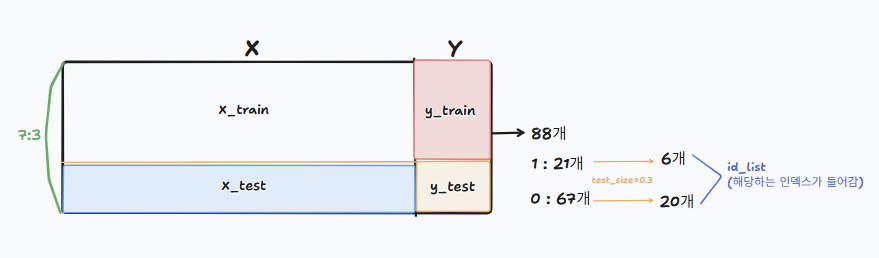

id_list의 인덱스와 동일한 id에 대해서 y_test, X_test가 만들어지고,  
그 외 인덱스에 대한 id로 X_train, y_train이 만들어진다.

### 계층적 샘플링(stratified sampling)
테스트셋을 나눌 때 전체 데이터에서 test_size만큼 떼어내는데  
1과 0의 비율을 원래 데이터 비율에 맞게 유지해서 샘플링
- 클래스 불균형 문제를 막는다.
- 테스트셋이 실제 분포를 잘 반영하도록 도와준다.

In [32]:
# 커스텀한 함수를 적용한 데이터셋이 어떤 차이가 있는지 확인해봅시다.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y)
print(X_train)
print('-'*50)
print(y_train)
print('-'*50)
print(X_test)
print('-'*50)
print(y_test)

      id  time  F_x  F_y  F_z  T_x  T_y  T_z
90     7     0   -3    1   53  -10   -4    0
91     7     1    0   -2   65   -4   -1    0
92     7     2   -1   -1   56   -7   -3    0
93     7     3    0   -2   60   -6    0    0
94     7     4   -1   -1   57   -7   -4    0
...   ..   ...  ...  ...  ...  ...  ...  ...
1315  88    10  -10    2   39  -21  -24    5
1316  88    11  -11    2   38  -24  -22    6
1317  88    12  -12    3   23  -24  -24    5
1318  88    13  -13    4   26  -29  -27    5
1319  88    14  -13    2   15  -25  -25    6

[930 rows x 8 columns]
--------------------------------------------------
7      True
8      True
9      True
10     True
11     True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 62, dtype: bool
--------------------------------------------------
     id  time  F_x  F_y  F_z  T_x  T_y  T_z
0     1     0   -1   -1   63   -3   -1    0
1     1     1    0    0   62   -3   -1    0
2     1     2   -1   -1   61   -3    0    0
3 

## 피처 추출하기

In [47]:
# 특징 추출
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

settings = MinimalFCParameters() # 최소한의 특징 추출 함수 
minimal_features_train = extract_features( # extract_features() X_train, X_test에서 여러 통계적 특징을 고려해 자동으로 추출
                                X_train,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

minimal_features_test = extract_features(
                                X_test,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.44it/s]


In [36]:
# 추출된 특징 확인
minimal_features_train

,F_x__sum_values,F_x__median,F_x__mean,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,F_x__maximum,F_x__absolute_maximum,F_x__minimum,...,T_z__sum_values,T_z__median,T_z__mean,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,T_z__maximum,T_z__absolute_maximum,T_z__minimum
7,-13.0,-1.0,-0.866667,15.0,0.805536,0.648889,1.183216,0.0,3.0,-3.0,...,-1.0,0.0,-0.066667,15.0,0.442217,0.195556,0.447214,1.0,1.0,-1.0
8,-10.0,-1.0,-0.666667,15.0,1.135292,1.288889,1.316561,2.0,2.0,-2.0,...,0.0,0.0,0.000000,15.0,1.032796,1.066667,1.032796,3.0,3.0,-1.0
9,-10.0,-1.0,-0.666667,15.0,1.074968,1.155556,1.264911,2.0,3.0,-3.0,...,3.0,0.0,0.200000,15.0,1.045626,1.093333,1.064581,3.0,3.0,-1.0
10,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0,...,0.0,0.0,0.000000,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
11,-13.0,-1.0,-0.866667,15.0,0.956847,0.915556,1.290994,1.0,3.0,-3.0,...,-3.0,0.0,-0.200000,15.0,0.400000,0.160000,0.447214,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-1073.0,-98.0,-71.533333,15.0,36.585729,1338.515556,80.346334,-25.0,110.0,-110.0,...,-232.0,-21.0,-15.466667,15.0,9.659998,93.315556,18.235497,0.0,28.0,-28.0
85,143.0,8.0,9.533333,15.0,4.616877,21.315556,10.592450,19.0,19.0,4.0,...,-52.0,-2.0,-3.466667,15.0,2.156128,4.648889,4.082483,0.0,7.0,-7.0
86,961.0,52.0,64.066667,15.0,38.235179,1461.928889,74.608757,148.0,148.0,21.0,...,-81.0,-8.0,-5.400000,15.0,5.462600,29.840000,7.681146,8.0,10.0,-10.0
87,4509.0,338.0,300.600000,15.0,57.753268,3335.440000,306.097697,342.0,342.0,171.0,...,475.0,35.0,31.666667,15.0,9.903983,98.088889,33.179311,44.0,44.0,13.0


In [37]:
minimal_features_train.columns

Index(['F_x__sum_values', 'F_x__median', 'F_x__mean', 'F_x__length',
       'F_x__standard_deviation', 'F_x__variance', 'F_x__root_mean_square',
       'F_x__maximum', 'F_x__absolute_maximum', 'F_x__minimum',
       'F_y__sum_values', 'F_y__median', 'F_y__mean', 'F_y__length',
       'F_y__standard_deviation', 'F_y__variance', 'F_y__root_mean_square',
       'F_y__maximum', 'F_y__absolute_maximum', 'F_y__minimum',
       'F_z__sum_values', 'F_z__median', 'F_z__mean', 'F_z__length',
       'F_z__standard_deviation', 'F_z__variance', 'F_z__root_mean_square',
       'F_z__maximum', 'F_z__absolute_maximum', 'F_z__minimum',
       'T_x__sum_values', 'T_x__median', 'T_x__mean', 'T_x__length',
       'T_x__standard_deviation', 'T_x__variance', 'T_x__root_mean_square',
       'T_x__maximum', 'T_x__absolute_maximum', 'T_x__minimum',
       'T_y__sum_values', 'T_y__median', 'T_y__mean', 'T_y__length',
       'T_y__standard_deviation', 'T_y__variance', 'T_y__root_mean_square',
       'T_y__maximu

## 시각화

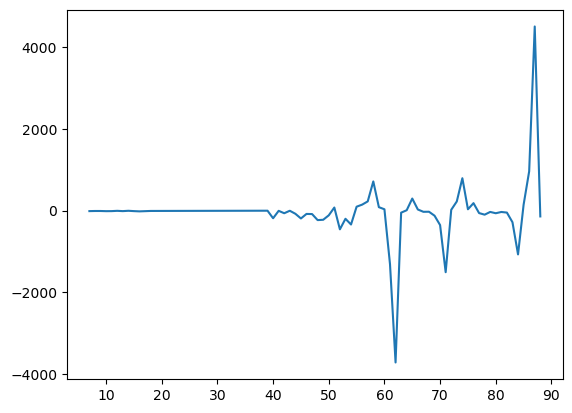

In [38]:
# 추출된 특징 시각화하기
plt.plot(minimal_features_train['F_x__sum_values'])
plt.show()

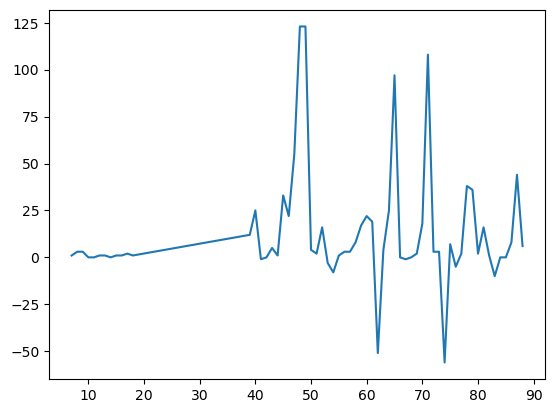

In [39]:
plt.plot(minimal_features_train['T_z__maximum'])
plt.show()

### LogisticRegression
이진 분류에 가장 기초가 되는 모델

In [44]:
# Logistic Regression 사용하기
logistic = LogisticRegression()
logistic.fit(minimal_features_train, y_train)

LogisticRegression()

In [45]:
# Logistic Regression score 확인하기
logistic.score(minimal_features_test, y_test)

0.8461538461538461

In [46]:
# 분류 성능 평가 지표 확인하기
# y는 True, False는 Target으로도 표현
classification_report(y_test, logistic.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True) # y_test 내부에 있는 true, false와 일치하는 이름을 표시합니다.

{'true': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.8888888888888888,
  'support': 20.0},
 'false': {'precision': 0.6, 'recall': 1.0, 'f1-score': 0.75, 'support': 6.0},
 'accuracy': 0.8461538461538461,
 'macro avg': {'precision': 0.8,
  'recall': 0.9,
  'f1-score': 0.8194444444444444,
  'support': 26.0},
 'weighted avg': {'precision': 0.9076923076923078,
  'recall': 0.8461538461538461,
  'f1-score': 0.8568376068376069,
  'support': 26.0}}

true 예측은 1.0으로 높은 정확도를 보이지만  
false 예측은 0.4로 좋은 모델로 보기 어렵다.